In [1]:
#Datei und Werte einlesen

import numpy as np
import matplotlib.pyplot as plt


# Listen zur Speicherung der Entfernungs- und Spannungswerte
average_voltages = []
standard_deviation_list = []
zähler = 0

# Entfernungswerte (in cm) für die Messungen von 10 cm bis 70 cm in 3-cm-Schritten
distance_values = range(10, 71, 3)

def generateListOfFiles():
    file_list = []
    for distance in distance_values:
        file_list.append(f'messwerte/{distance}cm.csv')
    return file_list

def comma_into_dot(x):
    return float(x.replace(b',', b'.'))

for file in generateListOfFiles():
    alldata = np.genfromtxt(file, delimiter=';', skip_header=1000, max_rows=1000, dtype=float, converters={0: comma_into_dot, 1: comma_into_dot})
    voltagedata = alldata[:, 1]
    average_voltages.append(np.mean(voltagedata))
    standard_deviation_list.append(np.std(voltagedata, ddof=1))
    print(f"Distanz = {distance_values[zähler]}cm, Mittelwert = {np.mean(voltagedata):.6f}, Standardabweichung = {np.std(voltagedata):.6f}")
    zähler += 1
    


Distanz = 10cm, Mittelwert = 1.398637, Standardabweichung = 0.014961
Distanz = 13cm, Mittelwert = 1.252550, Standardabweichung = 0.018522
Distanz = 16cm, Mittelwert = 1.126593, Standardabweichung = 0.017482
Distanz = 19cm, Mittelwert = 1.023867, Standardabweichung = 0.014485
Distanz = 22cm, Mittelwert = 0.910213, Standardabweichung = 0.023373
Distanz = 25cm, Mittelwert = 0.838877, Standardabweichung = 0.015462
Distanz = 28cm, Mittelwert = 0.787643, Standardabweichung = 0.017198
Distanz = 31cm, Mittelwert = 0.719662, Standardabweichung = 0.023022
Distanz = 34cm, Mittelwert = 0.684942, Standardabweichung = 0.022426
Distanz = 37cm, Mittelwert = 0.618181, Standardabweichung = 0.020477
Distanz = 40cm, Mittelwert = 0.606266, Standardabweichung = 0.013010
Distanz = 43cm, Mittelwert = 0.594333, Standardabweichung = 0.021152
Distanz = 46cm, Mittelwert = 0.581983, Standardabweichung = 0.023329
Distanz = 49cm, Mittelwert = 0.561892, Standardabweichung = 0.017519
Distanz = 52cm, Mittelwert = 0.557

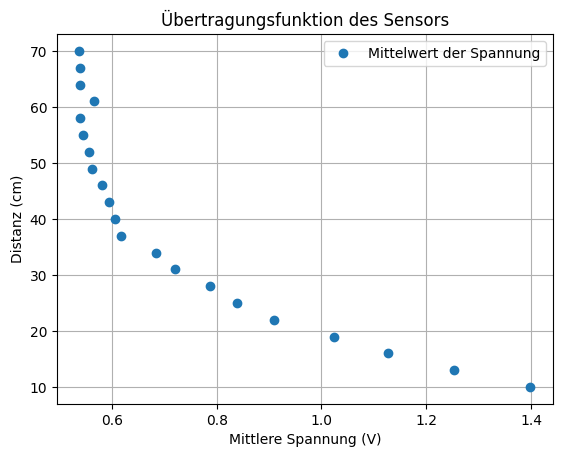

In [2]:
# Aufgabe 1
# Darstellung der Übertragungsfunktion mit Fehlerbalken
plt.errorbar(average_voltages, distance_values, fmt='o', capsize=5, label="Mittelwert der Spannung")
plt.xlabel("Mittlere Spannung (V)")
plt.ylabel("Distanz (cm)")
plt.title("Übertragungsfunktion des Sensors")
plt.legend()
plt.grid(True)
plt.show()

Mittelwert ln(Spannung): -0.35095225734364616
Mittelwert ln(Distanz): 3.55764078903571


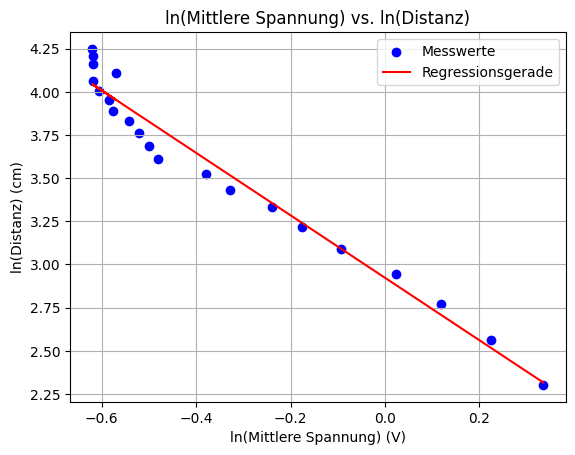

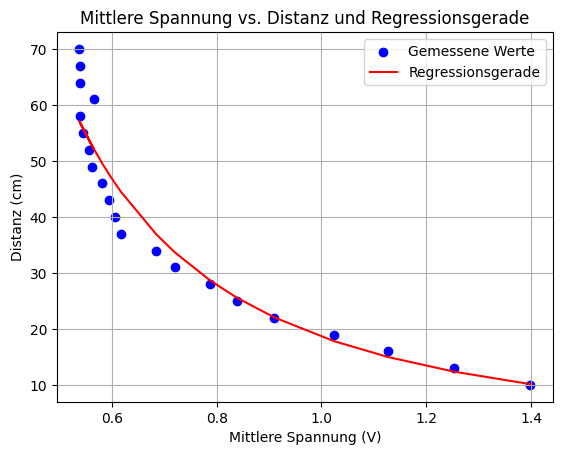

In [3]:
# Aufgabe 2
# Berechnung der logarithmischen Werte
ln_voltages = np.log(average_voltages)
ln_distances = np.log(distance_values)

# Mittelwert der logarithmischen Spannungen
ln_mean_voltage = np.mean(ln_voltages)
print("Mittelwert ln(Spannung):", ln_mean_voltage)

# Mittelwert der logarithmischen Distanzen
ln_mean_distance = np.mean(ln_distances)
print("Mittelwert ln(Distanz):", ln_mean_distance)

# Berechnung der Steigung a und des Offsets b der linearen Regression 
temp_calc_distance = ln_distances - ln_mean_distance
temp_calc_voltage = ln_voltages - ln_mean_voltage

slope_a = np.sum(temp_calc_voltage * temp_calc_distance) / np.sum(temp_calc_voltage ** 2)
intercept_b = ln_mean_distance - slope_a * ln_mean_voltage

# Berechnung der linearen Regressionsgeraden y' = a * x' + b
linear_regression_line = slope_a * ln_voltages + intercept_b

# Umrechnung der Werte e^b * x^a 
regression_values = np.exp(intercept_b) * np.power(average_voltages, slope_a)

# Darstellung von ln(mittlerer Spannung) vs. ln(Distanz)
plt.scatter(ln_voltages, ln_distances, color='blue', marker='o', label="Messwerte")
plt.plot(ln_voltages, linear_regression_line, color='red', label="Regressionsgerade")
plt.xlabel("ln(Mittlere Spannung) (V)")
plt.ylabel("ln(Distanz) (cm)")
plt.title("ln(Mittlere Spannung) vs. ln(Distanz)")
plt.legend()
plt.grid(True)
plt.show()

# Darstellung von Distanz vs. Spannung mit Regressionsgerade
plt.scatter(average_voltages, distance_values, color='blue', label="Gemessene Werte")
plt.plot(average_voltages, regression_values, color='red', label="Regressionsgerade")
plt.xlabel("Mittlere Spannung (V)")
plt.ylabel("Distanz (cm)")
plt.title("Mittlere Spannung vs. Distanz und Regressionsgerade")
plt.legend()
plt.grid(True)
plt.show()

In [4]:
# Aufgabe 3
data_width = np.genfromtxt("messwerte_dinA4/dina4_breite.csv", delimiter=';', skip_header=1000, max_rows=100, dtype=float, converters={0: comma_into_dot, 1: comma_into_dot})[:, 1]
data_length = np.genfromtxt("messwerte_dinA4/dina4_laenge.csv", delimiter=';', skip_header=1000, max_rows=100, dtype=float, converters={0: comma_into_dot, 1: comma_into_dot})[:, 1]

standard_deviation_breite = np.std(data_width, ddof=1)
standard_deviation_laenge = np.std(data_length, ddof=1)
width_mean = np.mean(data_width)
length_mean = np.mean(data_length)

standard_deviation_width = standard_deviation_breite / np.sqrt(len(data_width))
standard_deviation_length = standard_deviation_laenge / np.sqrt(len(data_length))
print("Zufällige Fehler der Spannungsmessung:")
print(f"s(Spannung Breite) = {standard_deviation_width}")
print(f"s(Spannung Länge) = {standard_deviation_length}")

correction_68 = 1.0
correction_95 = 1.96

width_voltage_mean_std = standard_deviation_width / np.sqrt(len(data_width))
length_voltage_mean_std = standard_deviation_length / np.sqrt(len(data_length))

print("\nKorrekte Form der Spannungsmessung:")
print(f"U(Breite) = {width_mean} +/- {correction_95} * {width_voltage_mean_std} V")
print(f"U(Länge) = {length_mean} +/- {correction_95} * {length_voltage_mean_std} V")

print("\nVetrauensbereiche:")
print(f"68% Breite: {correction_68} * {width_voltage_mean_std} = {correction_68 * width_voltage_mean_std}")
print(f"95% Breite: {correction_95} * {width_voltage_mean_std} = {correction_95 * width_voltage_mean_std}")
print(f"68% Länge: {correction_68} * {length_voltage_mean_std} = {correction_68 * length_voltage_mean_std}")
print(f"95% Länge: {correction_95} * {length_voltage_mean_std} = {correction_95 * length_voltage_mean_std}")



Zufällige Fehler der Spannungsmessung:
s(Spannung Breite) = 0.0018192124243599094
s(Spannung Länge) = 0.001840699685687937

Korrekte Form der Spannungsmessung:
U(Breite) = 0.9334952799999999 +/- 1.96 * 0.00018192124243599094 V
U(Länge) = 0.7396546250000003 +/- 1.96 * 0.00018406996856879372 V

Vetrauensbereiche:
68% Breite: 1.0 * 0.00018192124243599094 = 0.00018192124243599094
95% Breite: 1.96 * 0.00018192124243599094 = 0.00035656563517454223
68% Länge: 1.0 * 0.00018406996856879372 = 0.00018406996856879372
95% Länge: 1.96 * 0.00018406996856879372 = 0.0003607771383948357


In [5]:
# f(x) = e^b * x^a
# f'(x) = e^b * a * x^(a-1)
width = np.exp(intercept_b) * np.power(width_mean, slope_a)
length = np.exp(intercept_b) * np.power(length_mean, slope_a)

width_error = np.exp(intercept_b) * slope_a * np.power(width_mean, slope_a - 1) * width_voltage_mean_std
length_error = np.exp(intercept_b) * slope_a * np.power(length_mean, slope_a - 1) * length_voltage_mean_std

print("Korrekte Form der Distanzmessungen:")
print(f"width = {width} (+/- {correction_95} * {width_error}) cm")
print(f"length = {length} (+/- {correction_95} * {length_error}) cm")

Korrekte Form der Distanzmessungen:
width = 21.061949631840196 (+/- 1.96 * -0.007422212290352879) cm
length = 32.08368886799732 (+/- 1.96 * -0.014437824955571232) cm


In [6]:
# wv: width voltage
# lv: length voltage

# f(wv, lv) = e^b * wv^a * e^b * lv^a = e^(2b) * wv^a * lv^a

area = width * length

# df/dwv = e^(2b) * a * wv^(a-1) * lv^a
dwv = np.exp(2 * intercept_b) * slope_a * np.power(width_mean, slope_a - 1) * np.power(length_mean, slope_a)

# df/dlv = e^(2b) * wv^a * a * lv^(a-1)
dlv = np.exp(2 * intercept_b) * np.power(width_mean, slope_a) * slope_a * np.power(length_mean, slope_a - 1)

area_error = np.sqrt(np.power(dwv * width_voltage_mean_std, 2) + np.power(dlv * length_voltage_mean_std, 2))

print("Korrekte Form der Flächenmessung:")
print(f"a = {area} (+/- {correction_95} * {area_error}) cm^2")

Korrekte Form der Flächenmessung:
a = 675.7450389413915 (+/- 1.96 * 0.38623411106270195) cm^2
